## **Portugal proprieties - rent, buy and vacation.**
### Supervised Machine Learning - Data Wrangling and Visualization
#### Work developed by ***David Volovei*** and ***Miguel Venâncio***

*This dataset, derived from the House Prices dataset, gathers information about properties in Portugal. Extracted from a Portuguese website in March 2021, the entries include details such as location, rooms, price (in euros), area, bathrooms, house condition, ad type, and property type.
Through the analysis of this dataset, the aim is to explore patterns in sales prices, compare various features, and predict the price of a property based on specific characteristics.*

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from matplotlib.lines import Line2D
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
import joblib
scaler= MinMaxScaler()


In [37]:
df = pd.read_csv('portugal_ads_proprieties.csv', sep= ',')
df.head()

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,Used,Rent,House
1,"Mozelos, Santa Maria da Feira, Aveiro",2,5000.0,300.0,1.0,NaN,Rent,House
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,Used,Rent,House
3,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,Renovated,Rent,House
4,"Oiã, Oliveira do Bairro, Aveiro",4,1200.0,240.0,NaN,NaN,Rent,House


In [38]:
df.tail()

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType
62653,"Romarigães, Paredes de Coura, Viana do Castelo",1,500.0,100.0,1.0,New,Vacation,House
62654,"Cardielos e Serreleis, Viana do Castelo",3,850.0,120.0,1.0,Renovated,Vacation,House
62655,"Cardielos e Serreleis, Viana do Castelo",3,850.0,120.0,1.0,Renovated,Vacation,House
62656,"Chafé, Viana do Castelo",3,NaN,130.0,2.0,Used,Vacation,House
62657,"Barcos e Santa Leocádia, Tabuaço, Viseu",3,NaN,180.0,3.0,NaN,Vacation,House


It was used the *shape* , *.info()* and *.describe()* functions to have more information about the data.

In [39]:
df.shape

(62658, 8)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62658 entries, 0 to 62657
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       62658 non-null  object 
 1   Rooms          62658 non-null  object 
 2   Price          61488 non-null  float64
 3   Area           62658 non-null  float64
 4   Bathrooms      50146 non-null  float64
 5   Condition      37533 non-null  object 
 6   AdsType        62658 non-null  object 
 7   ProprietyType  62658 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.8+ MB


In [41]:
df.describe()

,Price,Area,Bathrooms
count,6.148800e+04,6.265800e+04,50146.000000
mean,4.832978e+05,2.117548e+04,2.665517
std,1.386355e+06,5.193458e+06,1.083112
min,1.150000e+02,1.000000e+00,1.000000
25%,1.650000e+05,1.210000e+02,2.000000
50%,3.285000e+05,1.800000e+02,3.000000
75%,5.450000e+05,2.580000e+02,4.000000
max,2.850000e+08,1.300000e+09,21.000000


Location to latitude and longitude using GeoPY

In [42]:
'''from geopy.geocoders import Nominatim

## Example of the function used to create 'Latitude and 'Longitude' from the 'Location' column

def get_coordinates(location):
    geolocator = Nominatim(user_agent="location_converter")
    location_info = geolocator.geocode(location)
    if location_info:
        return location_info.latitude, location_info.longitude
    else:
        return None, None

df_ml['Latitude'], df_ml['Longitude'] = zip(*df_ml['Location'].apply(lambda x: get_coordinates(x)))'''

'from geopy.geocoders import Nominatim\n\n## Example of the function used to create \'Latitude and \'Longitude\' from the \'Location\' column\n\ndef get_coordinates(location):\n    geolocator = Nominatim(user_agent="location_converter")\n    location_info = geolocator.geocode(location)\n    if location_info:\n        return location_info.latitude, location_info.longitude\n    else:\n        return None, None\n\ndf_ml[\'Latitude\'], df_ml[\'Longitude\'] = zip(*df_ml[\'Location\'].apply(lambda x: get_coordinates(x)))'

In [43]:
df = pd.read_csv('cleaned_merged.csv', sep= ',')

Through these functions, we can draw some initial conclusions:
   1. This dataset has 62658 entries and 8 entries.
   2. When it comes to variables we have: 5 *string* variables ('Location','Rooms','Condition','AdsType','ProprietyType') and 3 *float* variables ('Price', 'Area', 'Bathrooms').
   3. The price range is between 115€ and 285000€.
   4. The area range is between 1 square meter and 1.3 billion square meters.
   5. The average number of bathrooms per property is 2.67.

### **Data Wrangling And Exploratory Data Analysis (EDA)**

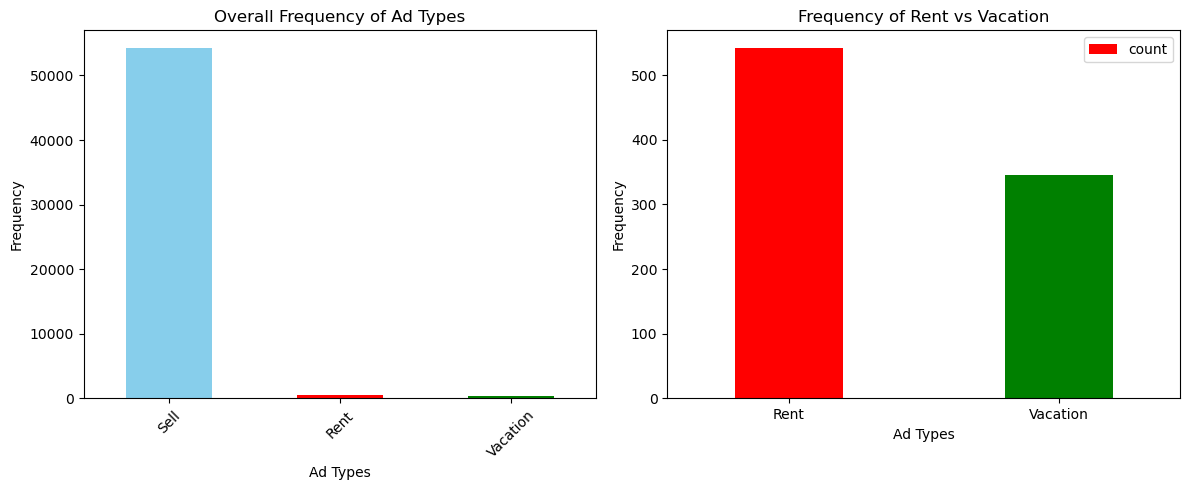

In [44]:
plt.figure(figsize=(12, 5))

# Plotting the frequency of all Ad Types: Sell, Rent and Vacation
plt.subplot(121)
all_adstype_counts = df['AdsType'].value_counts()
all_adstype_counts.plot(kind='bar', color=['skyblue', 'red', 'green'])
plt.title('Overall Frequency of Ad Types')
plt.xlabel('Ad Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

filtered_data = df[df['AdsType'].isin(['Rent', 'Vacation'])]

# Count the Ads of each Type
adstype_counts = filtered_data['AdsType'].value_counts()

# Plotting the frequency of the selected ad types side by side
plt.subplot(122)
adstype_counts.plot(kind='bar', color=['red', 'green'], position=0.5, width=0.4)
plt.title(f'Frequency of Rent vs Vacation')
plt.xlabel('Ad Types')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
#We decided to create a Price per square meter column, but didn't explore this feature
df['Price_per_sqm'] = df['Price'] / df['Area']
df.head()

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,Used,Rent,House,40.941670,-8.630438,13.605442
1,"Mozelos, Santa Maria da Feira, Aveiro",2,5000.0,300.0,1.0,NaN,Rent,House,40.997750,-8.560748,16.666667
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,Used,Rent,House,40.937052,-8.540065,8.955224
3,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,Renovated,Rent,House,40.655399,-8.453535,10.593220
4,"Oiã, Oliveira do Bairro, Aveiro",4,1200.0,240.0,NaN,NaN,Rent,House,40.545769,-8.540970,5.000000


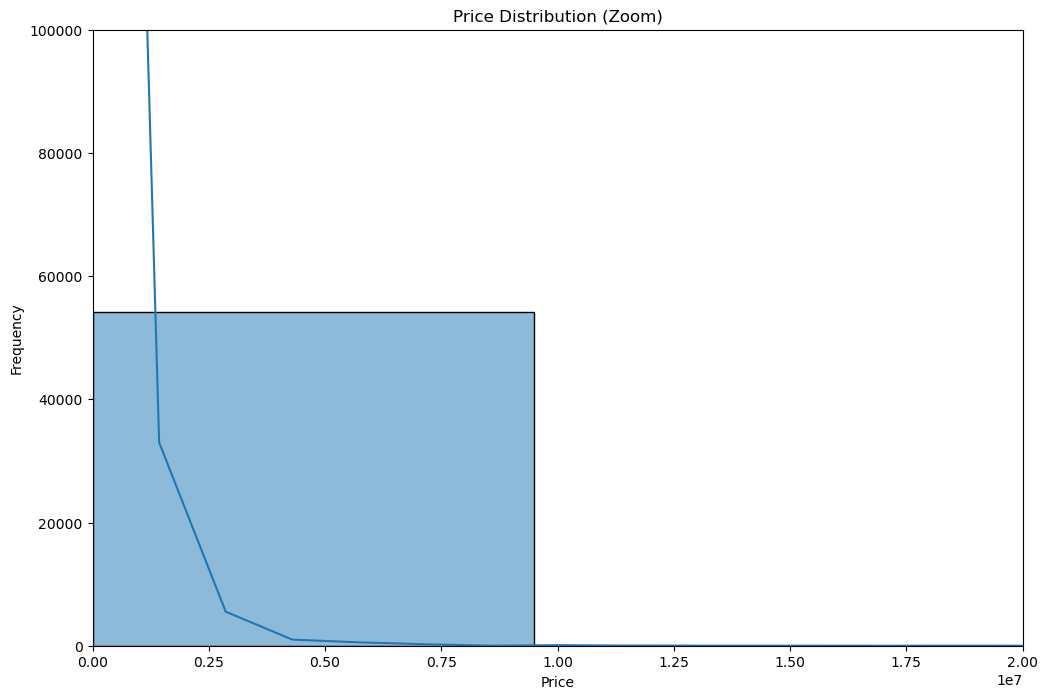

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(12, 8))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution (Zoom)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Zoom
plt.xlim(0, 20000000)  
plt.ylim(0, 100000)    

plt.show()

## **ELIMINATING NAN ENTRIES**

In [47]:
latitude_nan= df['Latitude'].isna()
df[latitude_nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm


In [48]:
longitude_nan= df['Longitude'].isna()
df[latitude_nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm


In [49]:
locations_nan= df['Location'].isna()
df[locations_nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm


In [50]:
rooms_nan= df['Rooms'].isna()
df[rooms_nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm


In [51]:
price_nan= df['Price'].isna()
df[price_nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm
13,"Oliveira de Azeméis, Santiago de Riba-Ul, Ul,...",0,NaN,40.0,1.0,Renovated,Rent,House,40.843107,-8.468516,NaN
43,"Brito, Guimarães, Braga",1,NaN,80.0,1.0,Renovated,Rent,House,41.454755,-8.365525,NaN
62,"Moreira de Cónegos, Guimarães, Braga",3,NaN,246.0,3.0,NaN,Rent,House,41.381491,-8.336153,NaN
116,"Vila Real de Santo António, Faro",3,NaN,100.0,1.0,Used,Rent,House,37.194605,-7.415563,NaN
135,"Almancil, Loulé, Faro",5,NaN,250.0,NaN,NaN,Rent,House,37.087057,-8.029806,NaN
...,...,...,...,...,...,...,...,...,...,...,...
55139,"Colares, Sintra, Lisboa",2,NaN,171.0,2.0,Used,Vacation,House,38.799181,-9.446217,NaN
55146,"Quinta do Anjo, Palmela, Setúbal",0,NaN,60.0,1.0,Used,Vacation,House,38.567457,-8.941867,NaN
55147,"Quinta do Anjo, Palmela, Setúbal",3,NaN,120.0,2.0,Renovated,Vacation,House,38.567457,-8.941867,NaN
55155,"Chafé, Viana do Castelo",3,NaN,130.0,2.0,Used,Vacation,House,41.649757,-8.781270,NaN


In [52]:
df= df.dropna(subset=['Price'])
df= df.reset_index(drop=True)
df[price_nan]

C:\Users\Chá Aquecido\AppData\Local\Temp\ipykernel_4052\4199826608.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[price_nan]


,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm
13,"Carregosa, Oliveira de Azeméis, Aveiro",3,130000.0,750.0,2.0,Used,Rent,House,40.883296,-8.415081,173.333333
43,"Fonte Arcada e Oliveira, Póvoa de Lanhoso, Braga",3,800.0,180.0,NaN,NaN,Rent,House,41.579458,-8.233413,4.444444
62,"Vila Nova de Famalicão e Calendário, Vila Nov...",2,650.0,95.0,3.0,Used,Rent,House,41.397599,-8.533924,6.842105
116,"Albufeira e Olhos de Água, Albufeira, Faro",4,2300.0,215.0,4.0,New,Rent,House,37.095166,-8.226175,10.697674
135,"Vila Real de Santo António, Faro",4,1300.0,126.0,3.0,New,Rent,House,37.194605,-7.415563,10.317460
...,...,...,...,...,...,...,...,...,...,...,...
53977,"Altura, Castro Marim, Faro",3,600.0,106.0,3.0,Used,Vacation,House,37.174206,-7.499071,5.660377
53983,"Albufeira e Olhos de Água, Albufeira, Faro",4,93639.0,250.0,4.0,Used,Vacation,House,37.095166,-8.226175,374.556000
53988,"Quarteira, Loulé, Faro",2,58345.0,112.0,3.0,Renovated,Vacation,House,37.071272,-8.102259,520.937500
54001,"São Gonçalo de Lagos, Lagos, Faro",5,4750.0,100.0,4.0,Used,Vacation,House,37.115343,-8.680351,47.500000


In [53]:
area_nan= df['Area'].isna()
df[area_nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm


In [54]:
bathrooms_nan= df['Bathrooms'].isna()
df[bathrooms_nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm
4,"Oiã, Oliveira do Bairro, Aveiro",4,1200.0,240.00,NaN,NaN,Rent,House,40.545769,-8.540970,5.000000
27,"Fermentões, Guimarães, Braga",3,1350.0,211.25,NaN,NaN,Rent,House,41.456583,-8.315665,6.390533
28,Escudeiros e Penso (Santo Estêvão e São Vicen...,3,1650.0,189.00,NaN,NaN,Rent,House,41.479139,-8.425154,8.730159
33,"Nogueira, Fraião e Lamaçães, Braga",4,2000.0,450.00,NaN,NaN,Rent,House,41.526386,-8.402004,4.444444
40,"Gavião, Vila Nova de Famalicão, Braga",4,2900.0,377.00,NaN,NaN,Rent,House,41.426518,-8.512953,7.692308
...,...,...,...,...,...,...,...,...,...,...,...
54132,"Luz, Lagos, Faro",4,1050.0,229.00,NaN,NaN,Vacation,House,37.086646,-8.731375,4.585153
54133,"Luz, Lagos, Faro",2,700.0,118.00,NaN,NaN,Vacation,House,37.086646,-8.731375,5.932203
54144,"Castro Marim, Faro",3,1000.0,200.00,NaN,NaN,Vacation,House,37.217937,-7.445710,5.000000
54152,"Tornada e Salir do Porto, Caldas da Rainha, L...",3,1200.0,150.00,NaN,NaN,Vacation,House,39.465330,-9.137081,8.000000


In [55]:
df= df.dropna(subset=['Bathrooms'])
df= df.reset_index(drop=True)

In [56]:
df= df.dropna(subset=['Condition'])
df= df.dropna(subset=['AdsType'])
df= df.reset_index(drop=True)

In [57]:
bathrooms_nan= df['ProprietyType'].isna()
df[bathrooms_nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm


# Index has been reset after deleting null entries

In [58]:
df_ml= df.copy()

Encoding 'AdsType' to:

0 - Rent

1 - Sell

2 - Vacation

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and encoding the 'AdsType' column 
df_ml['AdsType'] = label_encoder.fit_transform(df_ml['AdsType'])
df_ml


,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,Used,0,House,40.941670,-8.630438,13.605442
1,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,Used,0,House,40.937052,-8.540065,8.955224
2,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,Renovated,0,House,40.655399,-8.453535,10.593220
3,"Aradas, Aveiro",4,1250.0,82.0,2.0,Renovated,0,House,40.610025,-8.648090,15.243902
4,"Calvão, Vagos, Aveiro",4,1500.0,320.0,3.0,New,0,House,40.476744,-8.695158,4.687500
...,...,...,...,...,...,...,...,...,...,...,...
31857,"Castelo (Sesimbra), Sesimbra, Setúbal",2,600.0,80.0,1.0,Renovated,2,House,38.442858,-9.101100,7.500000
31858,"Arcos de Valdevez (São Paio) e Giela, Arcos d...",2,1153.0,100.0,3.0,Renovated,2,House,41.847850,-8.404393,11.530000
31859,"Arca e Ponte de Lima, Ponte de Lima, Viana do...",3,1400.0,162.0,2.0,Used,2,House,41.761360,-8.579483,8.641975
31860,"Romarigães, Paredes de Coura, Viana do Castelo",1,500.0,100.0,1.0,New,2,House,41.868334,-8.627327,5.000000


# The function 'Unique()' was used to check the unique values present in the columns

In [60]:
df_ml['Condition'].unique()

array(['Used', 'Renovated', 'New', 'Under construction', 'To recovery',
       'In ruin'], dtype=object)

In [61]:
df_ml['Condition'] = label_encoder.fit_transform(df_ml['Condition'])
df_ml

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Latitude,Longitude,Price_per_sqm
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,5,0,House,40.941670,-8.630438,13.605442
1,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,5,0,House,40.937052,-8.540065,8.955224
2,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,2,0,House,40.655399,-8.453535,10.593220
3,"Aradas, Aveiro",4,1250.0,82.0,2.0,2,0,House,40.610025,-8.648090,15.243902
4,"Calvão, Vagos, Aveiro",4,1500.0,320.0,3.0,1,0,House,40.476744,-8.695158,4.687500
...,...,...,...,...,...,...,...,...,...,...,...
31857,"Castelo (Sesimbra), Sesimbra, Setúbal",2,600.0,80.0,1.0,2,2,House,38.442858,-9.101100,7.500000
31858,"Arcos de Valdevez (São Paio) e Giela, Arcos d...",2,1153.0,100.0,3.0,2,2,House,41.847850,-8.404393,11.530000
31859,"Arca e Ponte de Lima, Ponte de Lima, Viana do...",3,1400.0,162.0,2.0,5,2,House,41.761360,-8.579483,8.641975
31860,"Romarigães, Paredes de Coura, Viana do Castelo",1,500.0,100.0,1.0,1,2,House,41.868334,-8.627327,5.000000


In [62]:
df_ml['ProprietyType'].unique()

array(['House'], dtype=object)

Dropped the 'ProprietyType' and the 'Price_per_sqm'

In [63]:
df_ml = df_ml.drop('ProprietyType', axis=1)
df_ml = df_ml.drop('Price_per_sqm', axis=1)
df_ml

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,Latitude,Longitude
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,5,0,40.941670,-8.630438
1,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,5,0,40.937052,-8.540065
2,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,2,0,40.655399,-8.453535
3,"Aradas, Aveiro",4,1250.0,82.0,2.0,2,0,40.610025,-8.648090
4,"Calvão, Vagos, Aveiro",4,1500.0,320.0,3.0,1,0,40.476744,-8.695158
...,...,...,...,...,...,...,...,...,...
31857,"Castelo (Sesimbra), Sesimbra, Setúbal",2,600.0,80.0,1.0,2,2,38.442858,-9.101100
31858,"Arcos de Valdevez (São Paio) e Giela, Arcos d...",2,1153.0,100.0,3.0,2,2,41.847850,-8.404393
31859,"Arca e Ponte de Lima, Ponte de Lima, Viana do...",3,1400.0,162.0,2.0,5,2,41.761360,-8.579483
31860,"Romarigães, Paredes de Coura, Viana do Castelo",1,500.0,100.0,1.0,1,2,41.868334,-8.627327


Checked if all values in the specified column end with '.0'

In [64]:
def check_end_zero(df, column_name):

    all_end_with_point_zero = df[column_name].astype(str).str.endswith('.0').all()
    
    if all_end_with_point_zero:
        print(f"All values in '{column_name}' end with '.0'")
    else:
        print(f"Not all values in '{column_name}' end with '.0'")

In [65]:
check_end_zero(df_ml, 'Price')

All values in 'Price' end with '.0'


In [66]:
df_ml['Price'] = df['Price'].astype(int)

In [67]:
check_end_zero(df_ml, 'Area')

Not all values in 'Area' end with '.0'


In [68]:
check_end_zero(df_ml, 'Bathrooms')

All values in 'Bathrooms' end with '.0'


In [69]:
df_ml['Bathrooms'] = df['Bathrooms'].astype(int)

In [70]:
df_ml

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,Latitude,Longitude
0,"Cortegaça, Ovar, Aveiro",4,2000,147.0,4,5,0,40.941670,-8.630438
1,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200,134.0,2,5,0,40.937052,-8.540065
2,"Macinhata do Vouga, Águeda, Aveiro",4,2500,236.0,2,2,0,40.655399,-8.453535
3,"Aradas, Aveiro",4,1250,82.0,2,2,0,40.610025,-8.648090
4,"Calvão, Vagos, Aveiro",4,1500,320.0,3,1,0,40.476744,-8.695158
...,...,...,...,...,...,...,...,...,...
31857,"Castelo (Sesimbra), Sesimbra, Setúbal",2,600,80.0,1,2,2,38.442858,-9.101100
31858,"Arcos de Valdevez (São Paio) e Giela, Arcos d...",2,1153,100.0,3,2,2,41.847850,-8.404393
31859,"Arca e Ponte de Lima, Ponte de Lima, Viana do...",3,1400,162.0,2,5,2,41.761360,-8.579483
31860,"Romarigães, Paredes de Coura, Viana do Castelo",1,500,100.0,1,1,2,41.868334,-8.627327


Divided Portugal in 75 zones, as shown in the mapa.jpg file

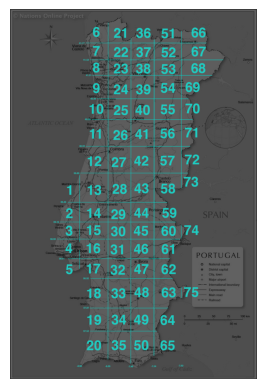

In [114]:
img = mpimg.imread('mapa.jpg')

plt.imshow(img)
plt.axis('off')  # Turn off axis 
plt.show()

In [71]:
zone_ranges = {
    '1': {'Latitude': (39.46, np.inf), 'Longitude': (np.NINF, -8.98)},
    '2': {'Latitude': (39.16, 39.46), 'Longitude': (np.NINF, -8.98)},
    '3': {'Latitude': (38.93, 39.16), 'Longitude': (np.NINF, -8.98)},
    '4': {'Latitude': (38.61, 38.93), 'Longitude': (np.NINF, -8.98)},
    '5': {'Latitude': (np.NINF, 38.61), 'Longitude': (np.NINF, -8.98)},
    '6': {'Latitude': (41.77, np.inf), 'Longitude': (-8.98, -8.39)},
    '7': {'Latitude': (41.53, 41.77), 'Longitude': (-8.98, -8.39)},
    '8': {'Latitude': (41.31, 41.53), 'Longitude': (-8.98, -8.39)},
    '9': {'Latitude': (40.99, 41.31), 'Longitude': (-8.98, -8.39)},
    '10': {'Latitude': (40.69, 40.99), 'Longitude': (-8.98, -8.39)},
    '11': {'Latitude': (40.32, 40.69), 'Longitude': (-8.98, -8.39)},
    '12': {'Latitude': (39.89, 40.32), 'Longitude': (-8.98, -8.39)},
    '13': {'Latitude': (39.46, 39.89), 'Longitude': (-8.98, -8.39)},
    '14': {'Latitude': (39.16, 39.46), 'Longitude': (-8.98, -8.39)},
    '15': {'Latitude': (38.93, 39.16), 'Longitude': (-8.98, -8.39)},
    '16': {'Latitude': (38.61, 38.93), 'Longitude': (-8.98, -8.39)},
    '17': {'Latitude': (38.32, 38.61), 'Longitude': (-8.98, -8.39)},
    '18': {'Latitude': (37.87, 38.32), 'Longitude': (-8.98, -8.39)},
    '19': {'Latitude': (37.52, 37.87), 'Longitude': (-8.98, -8.39)},
    '20': {'Latitude': (np.NINF, 37.52), 'Longitude': (-8.98, -8.39)},
    '21': {'Latitude': (41.77, np.inf), 'Longitude': (-8.39, -7.98)},
    '22': {'Latitude': (41.53, 41.77), 'Longitude': (-8.39, -7.98)},
    '23': {'Latitude': (41.31, 41.53), 'Longitude': (-8.39, -7.98)},
    '24': {'Latitude': (40.99, 41.31), 'Longitude': (-8.39, -7.98)},
    '25': {'Latitude': (40.69, 40.99), 'Longitude': (-8.39, -7.98)},
    '26': {'Latitude': (40.32, 40.69), 'Longitude': (-8.39, -7.98)},
    '27': {'Latitude': (39.89, 40.32), 'Longitude': (-8.39, -7.98)},
    '28': {'Latitude': (39.46, 39.89), 'Longitude': (-8.39, -7.98)},
    '29': {'Latitude': (39.16, 39.46), 'Longitude': (-8.39, -7.98)},
    '30': {'Latitude': (38.93, 39.16), 'Longitude': (-8.39, -7.98)},
    '31': {'Latitude': (38.61, 38.93), 'Longitude': (-8.39, -7.98)},
    '32': {'Latitude': (38.32, 38.61), 'Longitude': (-8.39, -7.98)},
    '33': {'Latitude': (37.87, 38.32), 'Longitude': (-8.39, -7.98)},
    '34': {'Latitude': (37.52, 37.87), 'Longitude': (-8.39, -7.98)},
    '35': {'Latitude': (np.NINF, 37.52), 'Longitude': (-8.39, -7.98)},
    '36': {'Latitude': (41.77, np.inf), 'Longitude': (-7.98, -7.54)},
    '37': {'Latitude': (41.53, 41.77), 'Longitude': (-7.98, -7.54)},
    '38': {'Latitude': (41.31, 41.53), 'Longitude': (-7.98, -7.54)},
    '39': {'Latitude': (40.99, 41.31), 'Longitude': (-7.98, -7.54)},
    '40': {'Latitude': (40.69, 40.99), 'Longitude': (-7.98, -7.54)},
    '41': {'Latitude': (40.32, 40.69), 'Longitude': (-7.98, -7.54)},
    '42': {'Latitude': (39.89, 40.32), 'Longitude': (-7.98, -7.54)},
    '43': {'Latitude': (39.46, 39.89), 'Longitude': (-7.98, -7.54)},
    '44': {'Latitude': (39.16, 39.46), 'Longitude': (-7.98, -7.54)},
    '45': {'Latitude': (38.93, 39.16), 'Longitude': (-7.98, -7.54)},
    '46': {'Latitude': (38.61, 38.93), 'Longitude': (-7.98, -7.54)},
    '47': {'Latitude': (38.32, 38.61), 'Longitude': (-7.98, -7.54)},
    '48': {'Latitude': (37.87, 38.32), 'Longitude': (-7.98, -7.54)},
    '49': {'Latitude': (37.52, 37.87), 'Longitude': (-7.98, -7.54)},
    '50': {'Latitude': (np.NINF, 37.52), 'Longitude': (-7.98, -7.54)},
    '51': {'Latitude': (41.77, np.inf), 'Longitude': (-7.54, -7.02)},
    '52': {'Latitude': (41.53, 41.77), 'Longitude': (-7.54, -7.02)},
    '53': {'Latitude': (41.31, 41.53), 'Longitude': (-7.54, -7.02)},
    '54': {'Latitude': (40.99, 41.31), 'Longitude': (-7.54, -7.02)},
    '55': {'Latitude': (40.69, 40.99), 'Longitude': (-7.54, -7.02)},
    '56': {'Latitude': (40.32, 40.69), 'Longitude': (-7.54, -7.02)},
    '57': {'Latitude': (39.89, 40.32), 'Longitude': (-7.54, -7.02)},
    '58': {'Latitude': (39.46, 39.89), 'Longitude': (-7.54, -7.02)},
    '59': {'Latitude': (39.16, 39.46), 'Longitude': (-7.54, -7.02)},
    '60': {'Latitude': (38.93, 39.16), 'Longitude': (-7.54, -7.02)},
    '61': {'Latitude': (38.61, 38.93), 'Longitude': (-7.54, -7.02)},
    '62': {'Latitude': (38.32, 38.61), 'Longitude': (-7.54, -7.02)},
    '63': {'Latitude': (37.87, 38.32), 'Longitude': (-7.54, -7.02)},
    '64': {'Latitude': (37.52, 37.87), 'Longitude': (-7.54, -7.02)},
    '65': {'Latitude': (np.NINF, 37.52), 'Longitude': (-7.54, -7.02)},
    '66': {'Latitude': (41.77, np.inf), 'Longitude': (-7.02, np.inf)},
    '67': {'Latitude': (41.58, 41.77), 'Longitude': (-7.02, np.inf)},
    '68': {'Latitude': (41.31, 41.58), 'Longitude': (-7.02, np.inf)},
    '69': {'Latitude': (40.99, 41.31), 'Longitude': (-7.02, np.inf)},
    '70': {'Latitude': (40.69, 40.99), 'Longitude': (-7.02, np.inf)},
    '71': {'Latitude': (40.32, 40.69), 'Longitude': (-7.02, np.inf)},
    '72': {'Latitude': (39.89, 40.32), 'Longitude': (-7.02, np.inf)},
    '73': {'Latitude': (39.46, 39.89), 'Longitude': (-7.02, np.inf)},
    '74': {'Latitude': (38.93, 39.16), 'Longitude': (-7.02, np.inf)},
    '75': {'Latitude': (np.NINF, 38.93), 'Longitude': (-7.02, np.inf)},
}

Created the 'Region' column to split the entries, with encoding purposes and to be easier to read

In [72]:
def get_region(row):
    latitude = row['Latitude']
    longitude = row['Longitude']
    for region, ranges in zone_ranges.items():
        lat_range = ranges['Latitude']
        long_range = ranges['Longitude']
        if (lat_range[0] <= latitude <= lat_range[1]) and (long_range[0] <= longitude <= long_range[1]):
            return region
    return None  # Return None if the point doesn't fall into any region

# Applying the function to create the 'Region' column
df_ml['Region'] = df_ml.apply(get_region, axis=1)
df_ml

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,Latitude,Longitude,Region
0,"Cortegaça, Ovar, Aveiro",4,2000,147.0,4,5,0,40.941670,-8.630438,10
1,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200,134.0,2,5,0,40.937052,-8.540065,10
2,"Macinhata do Vouga, Águeda, Aveiro",4,2500,236.0,2,2,0,40.655399,-8.453535,11
3,"Aradas, Aveiro",4,1250,82.0,2,2,0,40.610025,-8.648090,11
4,"Calvão, Vagos, Aveiro",4,1500,320.0,3,1,0,40.476744,-8.695158,11
...,...,...,...,...,...,...,...,...,...,...
31857,"Castelo (Sesimbra), Sesimbra, Setúbal",2,600,80.0,1,2,2,38.442858,-9.101100,5
31858,"Arcos de Valdevez (São Paio) e Giela, Arcos d...",2,1153,100.0,3,2,2,41.847850,-8.404393,6
31859,"Arca e Ponte de Lima, Ponte de Lima, Viana do...",3,1400,162.0,2,5,2,41.761360,-8.579483,7
31860,"Romarigães, Paredes de Coura, Viana do Castelo",1,500,100.0,1,1,2,41.868334,-8.627327,6


In [73]:
nan= df_ml['Region'].isna()
df_ml[nan]

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,Latitude,Longitude,Region


In [74]:
df_ml= df_ml.drop('Latitude', axis=1)
df_ml= df_ml.drop('Longitude', axis=1)
df_ml= df_ml.drop('Location', axis=1)
df_ml= df_ml.reset_index(drop=True)

Checked the type of the features

In [75]:
df_ml.dtypes

Rooms         object
Price          int32
Area         float64
Bathrooms      int32
Condition      int32
AdsType        int32
Region        object
dtype: object

In [76]:
df_ml['Rooms'] = df_ml['Rooms'].replace('10 ou superior', 10)

In [77]:
df_ml['Rooms'] = df_ml['Rooms'].astype(int)
df_ml['Condition'] = df_ml['Condition'].astype('category')
df_ml['AdsType'] = df_ml['AdsType'].astype('category')
df_ml['Region'] = df_ml['Region'].astype('category')
df_ml.dtypes

Rooms           int32
Price           int32
Area          float64
Bathrooms       int32
Condition    category
AdsType      category
Region       category
dtype: object

# **Division of the Dataframe in 3: 'Rent', 'Sell', and 'Vacation'**
 (0,1,2 respectively)

In [78]:
df_ml_0 = df_ml[df_ml['AdsType'] == 0].copy()
df_ml_0= df_ml_0.drop('AdsType', axis=1)
df_ml_0= df_ml_0.reset_index(drop=True)

df_ml_1 = df_ml[df_ml['AdsType'] == 1].copy()
df_ml_1= df_ml_1.drop('AdsType', axis=1)
df_ml_1= df_ml_1.reset_index(drop=True)

df_ml_2 = df_ml[df_ml['AdsType'] == 2].copy()
df_ml_2= df_ml_2.drop('AdsType', axis=1)
df_ml_2= df_ml_2.reset_index(drop=True)


In [79]:
df_ml_0

,Rooms,Price,Area,Bathrooms,Condition,Region
0,4,2000,147.0,4,5,10
1,4,1200,134.0,2,5,10
2,4,2500,236.0,2,2,11
3,4,1250,82.0,2,2,11
4,4,1500,320.0,3,1,11
...,...,...,...,...,...,...
352,1,550,130.0,1,2,6
353,4,3000,290.0,4,2,54
354,3,1500,304.0,3,5,24
355,2,500,70.0,1,5,39


In [80]:
df_ml_0['Price'] = pd.to_numeric(df_ml_0['Price'], errors='coerce')
# Converts the 'Price' to numeric values

custom_bins = [0, 500, 1000, 3500, 7500, 25000, np.inf]
#Created range for the 'Price' column


# Shift the labels to start from 0
df_ml_0['Price_Range'] = pd.cut(df_ml_0['Price'], bins=custom_bins, include_lowest=True, labels=[f'{i}' for i in range(len(custom_bins) - 1)])
df_ml_0 = df_ml_0.drop('Price', axis=1)
df_ml_0


,Rooms,Area,Bathrooms,Condition,Region,Price_Range
0,4,147.0,4,5,10,2
1,4,134.0,2,5,10,2
2,4,236.0,2,2,11,2
3,4,82.0,2,2,11,2
4,4,320.0,3,1,11,2
...,...,...,...,...,...,...
352,1,130.0,1,2,6,1
353,4,290.0,4,2,54,2
354,3,304.0,3,5,24,2
355,2,70.0,1,5,39,0


In [81]:
df_ml_1

,Rooms,Price,Area,Bathrooms,Condition,Region
0,3,385000,195.00,2,4,11
1,5,350000,227.00,4,3,24
2,3,300000,243.00,3,4,11
3,3,300000,245.00,3,4,11
4,3,290000,124.14,2,5,10
...,...,...,...,...,...,...
31254,4,335000,210.00,3,1,41
31255,2,29950,84.00,1,5,26
31256,3,55000,44.00,1,5,25
31257,3,105000,291.00,2,3,54


In [82]:
df_ml_1['Price'] = pd.to_numeric(df_ml_1['Price'], errors='coerce')
#Converting (again) the df to numeric values and creating ranges

custom_bins = [0, 25000, 75000, 150000, 350000, 700000, np.inf]


df_ml_1['Price_Range'] = pd.cut(df_ml_1['Price'], bins=custom_bins, include_lowest=True, labels=[f'{i}' for i in range(len(custom_bins) - 1)])
df_ml_1 = df_ml_1.drop('Price', axis=1)
df_ml_1

,Rooms,Area,Bathrooms,Condition,Region,Price_Range
0,3,195.00,2,4,11,4
1,5,227.00,4,3,24,3
2,3,243.00,3,4,11,3
3,3,245.00,3,4,11,3
4,3,124.14,2,5,10,3
...,...,...,...,...,...,...
31254,4,210.00,3,1,41,3
31255,2,84.00,1,5,26,1
31256,3,44.00,1,5,25,1
31257,3,291.00,2,3,54,2


In [83]:
df_ml_2['Price'] = pd.to_numeric(df_ml_2['Price'], errors='coerce')

#For the third time, created bins for the ranges and changed the 'Price' column to numeric values
custom_bins = [0, 500, 2500, 5000, 7500, 15000, np.inf]


df_ml_2['Price_Range'] = pd.cut(df_ml_2['Price'], bins=custom_bins, include_lowest=True, labels=[f'{i}' for i in range(len(custom_bins) - 1)])
df_ml_2 = df_ml_2.drop('Price', axis=1)
df_ml_2

,Rooms,Area,Bathrooms,Condition,Region,Price_Range
0,4,198.0,2,5,11,1
1,3,160.0,3,5,22,1
2,4,160.0,4,2,23,1
3,0,30.0,1,1,23,1
4,3,152.0,3,5,8,1
...,...,...,...,...,...,...
241,2,80.0,1,2,5,1
242,2,100.0,3,2,6,1
243,3,162.0,2,5,7,1
244,1,100.0,1,1,6,0


In [84]:
df_ml_0.to_csv('dfml0.csv', index=False) 
df_ml_1.to_csv('dfml1.csv', index=False) 
df_ml_2.to_csv('dfml2.csv', index=False) 

# **MAY THE ML ALGORITHMS START**

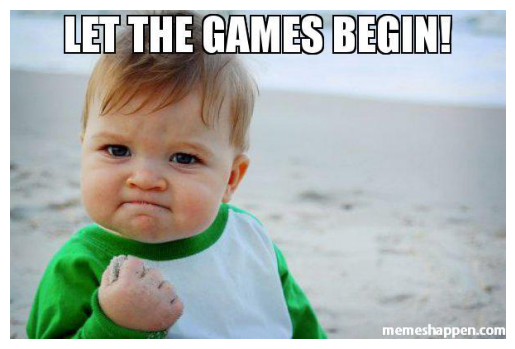

In [116]:
img_path = 'let_the_games_begin.jpg'
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')  
plt.show()

# **DF_ML_0**
## ML TRAINING AND TESTING FOR RENT

In [85]:
df_ml_0

,Rooms,Area,Bathrooms,Condition,Region,Price_Range
0,4,147.0,4,5,10,2
1,4,134.0,2,5,10,2
2,4,236.0,2,2,11,2
3,4,82.0,2,2,11,2
4,4,320.0,3,1,11,2
...,...,...,...,...,...,...
352,1,130.0,1,2,6,1
353,4,290.0,4,2,54,2
354,3,304.0,3,5,24,2
355,2,70.0,1,5,39,0


Random Forest Classifier - best accuracy 0.61

In [86]:
'''
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


X = df_ml_0.drop('Price_Range', axis=1)
y = df_ml_0['Price_Range']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiated the Random Forest Classifier and changed the parameters for better perfomance
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=300)  

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Additional evaluation metrics
print(classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, classification_report\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.metrics import confusion_matrix\n\n\n# Assuming X contains features and y contains target variable Price_Range\nX = df_ml_0.drop(\'Price_Range\', axis=1)\ny = df_ml_0[\'Price_Range\']\n\n# Split the data into training and testing sets (adjust test_size as needed)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Instantiate the Random Forest Classifier\nrf_classifier = RandomForestClassifier(n_estimators=500, random_state=300)  # You can adjust parameters here\n\n# Train the model\nrf_classifier.fit(X_train, y_train)\n\n# Make predictions\npredictions = rf_classifier.predict(X_test)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, predictions)\nprint(f"Accuracy: {accuracy}")\n\n# Additiona

SVMs - accuracy: 0.64

In [87]:
'''
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()
# Applied Min-Max scaling to the training data 'X_train'


scaler_2 = MinMaxScaler()
X_test_scaled = scaler_2.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()
# Applied Min-Max scaling to the test data 'X_test'


svc_algo = SVC(gamma='auto', kernel='rbf', C=32)
# Created SVM classifier

model = svc_algo.fit(X_train_scaled, y_train)
y_predict_0 = model.predict(X_test_scaled)
print(classification_report(y_test,y_predict_0))
'''

"\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import classification_report, confusion_matrix\n\nscaler = MinMaxScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)\nX_train_scaled.head()\n\nscaler_2 = MinMaxScaler()\nX_test_scaled = scaler_2.fit_transform(X_test)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)\nX_test_scaled.head()\n\nsvc_algo = SVC(gamma='auto', kernel='rbf', C=32)\nmodel = svc_algo.fit(X_train_scaled, y_train)\ny_predict_0 = model.predict(X_test_scaled)\nprint(classification_report(y_test,y_predict_0))\n"

XgBoost - accuracy: 0.52

In [88]:
'''
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initialized LabelEncoder
label_encoder = LabelEncoder()

# Converted string classes to integers because of the LabelEncoder (requires numeric values) 
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=500, learning_rate=0.4, random_state=50)

# Train of the XGBoost model
xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
predictions_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluation the XGBoost model and accuracy
accuracy_xgb = accuracy_score(y_test_encoded, predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
'''

'\nimport xgboost as xgb\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.preprocessing import LabelEncoder\n\n# Initialize LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Convert string classes to integers\ny_train_encoded = label_encoder.fit_transform(y_train)\ny_test_encoded = label_encoder.transform(y_test)\n# Initialize XGBoost classifier\nxgb_classifier = xgb.XGBClassifier(n_estimators=500, learning_rate=0.4, random_state=50)\n\n# Train the XGBoost model\nxgb_classifier.fit(X_train_scaled, y_train_encoded)\n\n# Make predictions on the test set\npredictions_xgb = xgb_classifier.predict(X_test_scaled)\n\n# Evaluate the XGBoost model\naccuracy_xgb = accuracy_score(y_test_encoded, predictions_xgb)\nprint(f"XGBoost Accuracy: {accuracy_xgb}")\n'

LIGHTGM - GRADIENT BOOSTING DECISION TREES - ACCURACY: 0.69

In [89]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import joblib

df_ml_0['Price_Range'] = df_ml_0['Price_Range'].astype(int)


X = df_ml_0.drop('Price_Range', axis=1)
y = df_ml_0['Price_Range']

scaler = MinMaxScaler()  
X = scaler.fit_transform(X) 


# Split the data into training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Parameters for the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': 6,
    # Number of classes in our target variable

    'boosting_type': 'gbdt',
    'metric': 'multi_error',
    'num_leaves': 115,
    'learning_rate': 0.05,
    'feature_fraction': 1.0,
    'bagging_fraction': 0.9,
    'bagging_freq': 85,
    'verbose': -10,
    'early_stopping_round': 155
}

# Training of the model
lgb_model = lgb.train(params, train_data, valid_sets=[test_data])
joblib.dump(lgb_model, 'model_0.pkl')
joblib.dump(scaler, 'scaler_0.pkl')

# Predictions on the test set
y_pred = lgb_model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1) # Convert predicted probabilities to class labels

#Accuracy of the LightGbm Model
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5972222222222222


Catboost - accuracy: 0.625

In [91]:
'''
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Converted target classes to integers for the classifier
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Started CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=65, learning_rate=0.54, random_state=10, verbose=False)

# Training the model
catboost_classifier.fit(X_train_scaled, y_train)

# predictions on the test set
predictions_catboost = catboost_classifier.predict(X_test_scaled)

# Accuracy of the CatBoost model
accuracy_catboost = accuracy_score(y_test, predictions_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost}")
'''

'\nfrom catboost import CatBoostClassifier\nfrom sklearn.metrics import accuracy_score\n\n# Convert target classes to integers if not done already\ny_train = y_train.astype(int)\ny_test = y_test.astype(int)\n\n# Initialize CatBoost classifier\ncatboost_classifier = CatBoostClassifier(iterations=65, learning_rate=0.54, random_state=10, verbose=False)\n\n# Train the CatBoost model\ncatboost_classifier.fit(X_train_scaled, y_train)\n\n# Make predictions on the test set\npredictions_catboost = catboost_classifier.predict(X_test_scaled)\n\n# Evaluate the CatBoost model\naccuracy_catboost = accuracy_score(y_test, predictions_catboost)\nprint(f"CatBoost Accuracy: {accuracy_catboost}")\n'

Neural Network - accuracy with 50 epochs: 0.50

In [92]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

#Transforming the target classes into a one-hot encoded representation for better model compatibility
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Build simple neural network model 
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_binarizer.classes_), activation='softmax')  # Output layer with softmax activation used for multi-class
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_scaled, y_train_one_hot, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot), verbose=1)

# Assessing the model's performance using the test dataset
_, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
print(f"Neural Network Accuracy: {accuracy}")'''


'from tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom tensorflow.keras.optimizers import Adam\nfrom sklearn.preprocessing import LabelBinarizer\nfrom sklearn.metrics import accuracy_score\n\n# Convert target classes to one-hot encoded format\nlabel_binarizer = LabelBinarizer()\ny_train_one_hot = label_binarizer.fit_transform(y_train)\ny_test_one_hot = label_binarizer.transform(y_test)\n\n# Build a simple neural network model\nmodel = Sequential([\n    Dense(128, input_shape=(X_train_scaled.shape[1],), activation=\'relu\'),\n    Dropout(0.5),\n    Dense(64, activation=\'relu\'),\n    Dropout(0.5),\n    Dense(len(label_binarizer.classes_), activation=\'softmax\')  # Output layer with softmax activation for multi-class\n])\n\n# Compile the model\nmodel.compile(optimizer=Adam(learning_rate=0.001), loss=\'categorical_crossentropy\', metrics=[\'accuracy\'])\n\n# Train the model\nhistory = model.fit(X_train_scaled, y_train_one_hot, epochs=50

In [93]:
# WHATS DONE:
# JA LIMPEI O DATASET
# PASSEI OS DOUBLE PARA INT
# ENCRIPTEI AS STRINGS ( FALTA A LOCATION )
# DROPEI O PROPRIETY TYPE PORQUE ERA TUDO 'HOUSE'
# DIVIDI O MAPA DE PORTUGAL EM ZONAS
# DIVIDIR EM 3 DATAFRAMES, 1 PARA SELL 1 PARA RENT E 1 PARA VACATION
# PROVAVELMENTE VAMOS TER QUE PASSAR O PRICE PARA RANGE (REGRESSAO LINEAR SUCKS)
# CRIAR COLUNA DE LATITUDE E LONGITUDE | VAI DEMORAR TIPO 10H!!!!!!!
# ENCRIPTAR A LOCATION DE ACORDO COM LATITUDE, LONGITUDE


# **DF ML 1**
## ML TRAINING AND TESTING FOR SELL

In [94]:
df_ml_1

,Rooms,Area,Bathrooms,Condition,Region,Price_Range
0,3,195.00,2,4,11,4
1,5,227.00,4,3,24,3
2,3,243.00,3,4,11,3
3,3,245.00,3,4,11,3
4,3,124.14,2,5,10,3
...,...,...,...,...,...,...
31254,4,210.00,3,1,41,3
31255,2,84.00,1,5,26,1
31256,3,44.00,1,5,25,1
31257,3,291.00,2,3,54,2


In [95]:
df_ml_1['Price_Range'] = df_ml_1['Price_Range'].astype(int)

# LightGBM Model

In [96]:
X = df_ml_1.drop('Price_Range', axis=1)
y = df_ml_1['Price_Range']

scaler = MinMaxScaler()  # Initialize the MinMaxScaler
X = scaler.fit_transform(X) 


# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LightGMB - accuracy: 0.62

In [97]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Parameters used in this model
params = {
    'objective': 'multiclass',
    'num_class': 6,  # Number of classes of our target variable
    'boosting_type': 'gbdt',
    'metric': 'multi_error',
    'num_leaves': 115,
    'learning_rate': 0.05,
    'feature_fraction': 1.0,
    'bagging_fraction': 0.9,
    'bagging_freq': 85,
    'verbose': -10,
    'early_stopping_round': 155
}

# Training the model
lgb_model = lgb.train(params, train_data, valid_sets=[test_data])
joblib.dump(lgb_model, 'model_1.pkl')
joblib.dump(scaler, 'scaler_1.pkl')

# Predict on the test set
y_pred = lgb_model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1) # Transforming the predicted probabilities into corresponding class labels.

# Accuracy:
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6150031989763276


Neural Network with 50 epochs - accuracy: 0.32

In [98]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# Convert target classes to one-hot encoded format
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Build of a simple neural network model
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_binarizer.classes_), activation='softmax')  # Output layer with softmax activation for multi-class
])

# Compilation of the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot), verbose=1)

# Evaluate the model on test data
_, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
print(f"Neural Network Accuracy: {accuracy}")
'''

'\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom tensorflow.keras.optimizers import Adam\nfrom sklearn.preprocessing import LabelBinarizer\nfrom sklearn.metrics import accuracy_score\n\n# Convert target classes to one-hot encoded format\nlabel_binarizer = LabelBinarizer()\ny_train_one_hot = label_binarizer.fit_transform(y_train)\ny_test_one_hot = label_binarizer.transform(y_test)\n\n# Build a simple neural network model\nmodel = Sequential([\n    Dense(128, input_shape=(X_train_scaled.shape[1],), activation=\'relu\'),\n    Dropout(0.5),\n    Dense(64, activation=\'relu\'),\n    Dropout(0.5),\n    Dense(len(label_binarizer.classes_), activation=\'softmax\')  # Output layer with softmax activation for multi-class\n])\n\n# Compile the model\nmodel.compile(optimizer=Adam(learning_rate=0.001), loss=\'categorical_crossentropy\', metrics=[\'accuracy\'])\n\n# Train the model\nhistory = model.fit(X_train_scaled, y_train_one_hot, epochs=

Catboost - accuracy: 0.61

In [99]:
'''
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Converted target classes to integers 
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initialization of the CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=90, learning_rate=0.67, random_state=10, verbose=False)

# Train the model
catboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_catboost = catboost_classifier.predict(X_test_scaled)

# accuracy of the CatBoost model
accuracy_catboost = accuracy_score(y_test, predictions_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost}")
'''

'\nfrom catboost import CatBoostClassifier\nfrom sklearn.metrics import accuracy_score\n\n# Convert target classes to integers if not done already\ny_train = y_train.astype(int)\ny_test = y_test.astype(int)\n\n# Initialize CatBoost classifier\ncatboost_classifier = CatBoostClassifier(iterations=90, learning_rate=0.67, random_state=10, verbose=False)\n\n# Train the CatBoost model\ncatboost_classifier.fit(X_train_scaled, y_train)\n\n# Make predictions on the test set\npredictions_catboost = catboost_classifier.predict(X_test_scaled)\n\n# Evaluate the CatBoost model\naccuracy_catboost = accuracy_score(y_test, predictions_catboost)\nprint(f"CatBoost Accuracy: {accuracy_catboost}")\n'

XGBoost - accuracy: 0.61

In [100]:
'''
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Converted string classes to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.3, random_state=50)

# Training the XGBoost model
xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
predictions_xgb = xgb_classifier.predict(X_test_scaled)

# Accuracy XGBoost model
accuracy_xgb = accuracy_score(y_test_encoded, predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
'''

'\nimport xgboost as xgb\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.preprocessing import LabelEncoder\n\n# Initialize LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Convert string classes to integers\ny_train_encoded = label_encoder.fit_transform(y_train)\ny_test_encoded = label_encoder.transform(y_test)\n# Initialize XGBoost classifier\nxgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.3, random_state=50)\n\n# Train the XGBoost model\nxgb_classifier.fit(X_train_scaled, y_train_encoded)\n\n# Make predictions on the test set\npredictions_xgb = xgb_classifier.predict(X_test_scaled)\n\n# Evaluate the XGBoost model\naccuracy_xgb = accuracy_score(y_test_encoded, predictions_xgb)\nprint(f"XGBoost Accuracy: {accuracy_xgb}")\n'

SVM - accuracy: 0.48

In [101]:
'''
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_algo = SVC(gamma='auto', kernel='rbf', C=32)
model = svc_algo.fit(X_train, y_train)
y_predict_1 = model.predict(X_test)
print(classification_report(y_test,y_predict_1))
'''

"\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import classification_report, confusion_matrix\n\nsvc_algo = SVC(gamma='auto', kernel='rbf', C=32)\nmodel = svc_algo.fit(X_train, y_train)\ny_predict_1 = model.predict(X_test)\nprint(classification_report(y_test,y_predict_1))\n"

Random Forest Classifier - accuracy: 0.57

In [102]:
'''
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=300)

# Trained the model on scaled data
rf_classifier.fit(X_train, y_train)

# Predictions on the scaled test set
predictions = rf_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))
'''

'\nrf_classifier = RandomForestClassifier(n_estimators=500, random_state=300)\n\n# Train the model on scaled data\nrf_classifier.fit(X_train, y_train)\n\n# Make predictions on the scaled test set\npredictions = rf_classifier.predict(X_test)\n\n# Evaluate the model\nprint(classification_report(y_test, predictions))\n'

# **DF ML 2**
## ML TRAINING AND TESTING FOR VACATION

In [103]:
df_ml_2

,Rooms,Area,Bathrooms,Condition,Region,Price_Range
0,4,198.0,2,5,11,1
1,3,160.0,3,5,22,1
2,4,160.0,4,2,23,1
3,0,30.0,1,1,23,1
4,3,152.0,3,5,8,1
...,...,...,...,...,...,...
241,2,80.0,1,2,5,1
242,2,100.0,3,2,6,1
243,3,162.0,2,5,7,1
244,1,100.0,1,1,6,0


In [104]:
df_ml_2['Price_Range'] = df_ml_2['Price_Range'].astype(int)

In [105]:
X = df_ml_2.drop('Price_Range', axis=1)
y = df_ml_2['Price_Range']

scaler = MinMaxScaler()  
X = scaler.fit_transform(X) 


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Light GBM - accuracy: 0.88

In [106]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

    # Parameters for LightGBM 
params = {
    'objective': 'multiclass',
    'num_class': 6,  # Classes in our target variable
    'boosting_type': 'gbdt',
    'metric': 'multi_error',
    'num_leaves': 115,
    'learning_rate': 0.05,
    'feature_fraction': 1.0,
    'bagging_fraction': 0.9,
    'bagging_freq': 85,
    'verbose': -10,
    'early_stopping_round': 155
}

# Train 
lgb_model = lgb.train(params, train_data, valid_sets=[test_data])
joblib.dump(lgb_model, 'model_2.pkl')
joblib.dump(scaler, 'scaler_2.pkl')

# Predictions on the test set
y_pred = lgb_model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1) # Convert predicted probabilities to class labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy}')

Accuracy: 0.88


Catboost - accuracy: 0.78

In [108]:
'''
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Convert target classes to integers values
y_train = y_train.astype(int)
y_test = y_test.astype(int)

catboost_classifier = CatBoostClassifier(iterations=90, learning_rate=0.67, random_state=10, verbose=False)

# Train model
catboost_classifier.fit(X_train, y_train)

# Predictions on the test set
predictions_catboost = catboost_classifier.predict(X_test)

# CatBoost model accuracy
accuracy_catboost = accuracy_score(y_test, predictions_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost}")
'''

'\nfrom catboost import CatBoostClassifier\nfrom sklearn.metrics import accuracy_score\n\n# Convert target classes to integers if not done already\ny_train = y_train.astype(int)\ny_test = y_test.astype(int)\n\n# Initialize CatBoost classifier\ncatboost_classifier = CatBoostClassifier(iterations=90, learning_rate=0.67, random_state=10, verbose=False)\n\n# Train the CatBoost model\ncatboost_classifier.fit(X_train, y_train)\n\n# Make predictions on the test set\npredictions_catboost = catboost_classifier.predict(X_test)\n\n# Evaluate the CatBoost model\naccuracy_catboost = accuracy_score(y_test, predictions_catboost)\nprint(f"CatBoost Accuracy: {accuracy_catboost}")\n'

XGBoost - accuracy: 0.92

In [109]:
'''
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# -LabelEncoder 
label_encoder = LabelEncoder()

# Transforming categorical class labels into numerical 
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.3, random_state=50)
joblib.dump(xgb_classifier, 'model_2.pkl')
joblib.dump(scaler, 'scaler_2.pkl')

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train_encoded)

# Predictions
predictions_xgb = xgb_classifier.predict(X_test)

# Evaluation of XGBoost model
accuracy_xgb = accuracy_score(y_test_encoded, predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
'''

'\nimport xgboost as xgb\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.preprocessing import LabelEncoder\n\n# Initialize LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Convert string classes to integers\ny_train_encoded = label_encoder.fit_transform(y_train)\ny_test_encoded = label_encoder.transform(y_test)\n# Initialize XGBoost classifier\nxgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.3, random_state=50)\njoblib.dump(xgb_classifier, \'model_2.pkl\')\njoblib.dump(scaler, \'scaler_2.pkl\')\n\n# Train the XGBoost model\nxgb_classifier.fit(X_train, y_train_encoded)\n\n# Make predictions on the test set\npredictions_xgb = xgb_classifier.predict(X_test)\n\n# Evaluate the XGBoost model\naccuracy_xgb = accuracy_score(y_test_encoded, predictions_xgb)\nprint(f"XGBoost Accuracy: {accuracy_xgb}")\n'

SVM - accuracy: 0.74

In [110]:
'''
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_algo = SVC(gamma='auto', kernel='rbf', C=32)
model = svc_algo.fit(X_train, y_train)
y_predict_1 = model.predict(X_test)
print(classification_report(y_test,y_predict_1))
'''

"\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import classification_report, confusion_matrix\n\nsvc_algo = SVC(gamma='auto', kernel='rbf', C=32)\nmodel = svc_algo.fit(X_train, y_train)\ny_predict_1 = model.predict(X_test)\nprint(classification_report(y_test,y_predict_1))\n"

Random Forest Classifier - accuracy: 0.86

In [111]:
'''
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=300)

# Train the model on fitted data
rf_classifier.fit(X_train, y_train)

# Make predictions on the scaled test set
predictions = rf_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))
'''

'\nrf_classifier = RandomForestClassifier(n_estimators=500, random_state=300)\n\n# Train the model on scaled data\nrf_classifier.fit(X_train, y_train)\n\n# Make predictions on the scaled test set\npredictions = rf_classifier.predict(X_test)\n\n# Evaluate the model\nprint(classification_report(y_test, predictions))\n'

Neural Network 2000 epochs - accuracy: 0.82

In [112]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# Convert target classes to one-hot encoded format
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Neural network model
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_binarizer.classes_), activation='softmax')  # Output layer with softmax activation for multi-class
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Last training of the models
history = model.fit(X_train, y_train_one_hot, epochs=2000, batch_size=32, validation_data=(X_test, y_test_one_hot), verbose=1)

# Accuracy on test data
_, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Neural Network Accuracy: {accuracy}")
'''

'\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom tensorflow.keras.optimizers import Adam\nfrom sklearn.preprocessing import LabelBinarizer\nfrom sklearn.metrics import accuracy_score\n\n# Convert target classes to one-hot encoded format\nlabel_binarizer = LabelBinarizer()\ny_train_one_hot = label_binarizer.fit_transform(y_train)\ny_test_one_hot = label_binarizer.transform(y_test)\n\n# Build a simple neural network model\nmodel = Sequential([\n    Dense(128, input_shape=(X_train_scaled.shape[1],), activation=\'relu\'),\n    Dropout(0.5),\n    Dense(64, activation=\'relu\'),\n    Dropout(0.5),\n    Dense(len(label_binarizer.classes_), activation=\'softmax\')  # Output layer with softmax activation for multi-class\n])\n\n# Compile the model\nmodel.compile(optimizer=Adam(learning_rate=0.001), loss=\'categorical_crossentropy\', metrics=[\'accuracy\'])\n\n# Train the model\nhistory = model.fit(X_train, y_train_one_hot, epochs=2000, b